In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

sns.set()

In [4]:
data_path = os.path.join('datasets', 'LeagueOfLegends', 'high_diamond_ranked_10min.csv')
df = pd.read_csv(data_path)
df.drop(columns=['gameId'], inplace=True)
print('Shape is ', df.shape)
df.head()

Shape is  (9879, 39)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
df.isnull().sum() / df.count()

blueWins                        0.0
blueWardsPlaced                 0.0
blueWardsDestroyed              0.0
blueFirstBlood                  0.0
blueKills                       0.0
blueDeaths                      0.0
blueAssists                     0.0
blueEliteMonsters               0.0
blueDragons                     0.0
blueHeralds                     0.0
blueTowersDestroyed             0.0
blueTotalGold                   0.0
blueAvgLevel                    0.0
blueTotalExperience             0.0
blueTotalMinionsKilled          0.0
blueTotalJungleMinionsKilled    0.0
blueGoldDiff                    0.0
blueExperienceDiff              0.0
blueCSPerMin                    0.0
blueGoldPerMin                  0.0
redWardsPlaced                  0.0
redWardsDestroyed               0.0
redFirstBlood                   0.0
redKills                        0.0
redDeaths                       0.0
redAssists                      0.0
redEliteMonsters                0.0
redDragons                  

Great! There are no nulls. All data should be like that.

In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

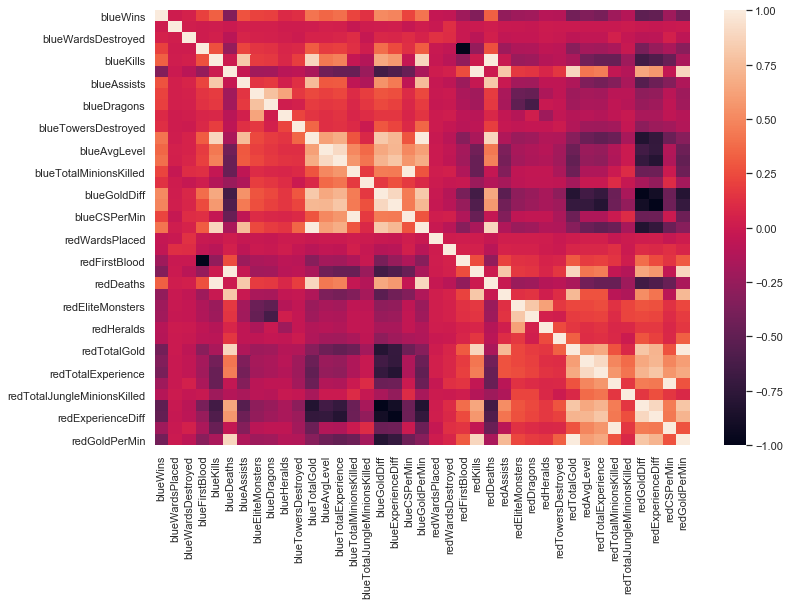

In [9]:
corr_mat = train_df.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, ax=ax)

In [ ]:
multicor_cols = ['redFirstBlood', 'redKills', 'redDeaths', 'redGoldDiff', 'redExperienceDiff', 
                 'redCSPerMin', 'redGoldPerMin', 'blueCSPerMin', 'blueGoldPerMin']

Machine Learning

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [24]:
X_train = train_df.drop(columns='blueWins')
Y_train = train_df['blueWins']
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X_train, Y_train, cv=5)
np.mean(scores)

0.7317482926204373

In [71]:
model = RandomForestClassifier(max_depth=10)
scores = cross_val_score(model, X_train, Y_train, cv=10)
np.mean(scores)

0.7258002208388677

In [72]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
feat_imp = list(zip(X_train.columns, model.feature_importances_))
feat_imp.sort(key=lambda x: x[1], reverse=True)
feat_imp

[('redGoldDiff', 0.15353057541831863),
 ('blueGoldDiff', 0.12686845190590937),
 ('blueExperienceDiff', 0.10068257549579271),
 ('redExperienceDiff', 0.07523064930615969),
 ('redGoldPerMin', 0.04707526284727111),
 ('redTotalGold', 0.046068028521244614),
 ('blueTotalGold', 0.04378633808278471),
 ('blueGoldPerMin', 0.043290566169708646),
 ('blueTotalExperience', 0.0350636748990961),
 ('redTotalExperience', 0.03187474263042021),
 ('redTotalMinionsKilled', 0.019402985768115572),
 ('blueTotalJungleMinionsKilled', 0.019233755086015356),
 ('blueTotalMinionsKilled', 0.018214361202298864),
 ('blueCSPerMin', 0.018015060248813625),
 ('redCSPerMin', 0.01771947140229695),
 ('redWardsPlaced', 0.017565169413152323),
 ('redTotalJungleMinionsKilled', 0.017020563104259114),
 ('blueWardsPlaced', 0.01646803772282507),
 ('blueAssists', 0.01508487017739156),
 ('redAssists', 0.014855444606368739),
 ('blueKills', 0.011925106004738159),
 ('blueAvgLevel', 0.011415111121163994),
 ('redKills', 0.011360073103817403)

In [38]:
model = GaussianNB()
scores = cross_val_score(model, X_train, Y_train, cv=5)
np.mean(scores)

0.72732031481437

In [73]:
X_test = test_df.drop(columns='blueWins')
Y_test = test_df['blueWins']

model.score(X_test, Y_test)

0.7201417004048583